<h1>Sales Data Analysis<h1>

In this notebook we try to solve the questions presented in this database.

Q: What was the best Year for sales? How much was earned that Year?

Q: What was the best month for sales? How much was earned that month?

Q: What City had the highest number of sales?

Q: What time should we display adverstisement to maximize likelihood of customer's buying product?

Q: What products are most often sold together?

Q: What product sold the most? Why do you think it sold the most?

<h3>Import libraries</h3>

In [4]:
import pandas as pd
import seaborn as sns

<h3>Import Data</h3>

In [5]:
data_1 = pd.read_csv('data\Sales_April_2019.csv')
data_2 = pd.read_csv('data\Sales_August_2019.csv')
data_3 = pd.read_csv('data\Sales_December_2019.csv')
data_4 = pd.read_csv('data\Sales_February_2019.csv')
data_6 = pd.read_csv('data\Sales_January_2019.csv')
data_7 = pd.read_csv('data\Sales_July_2019.csv')
data_8 = pd.read_csv('data\Sales_June_2019.csv')
data_9 = pd.read_csv('data\Sales_March_2019.csv')
data_10 = pd.read_csv('data\Sales_May_2019.csv')
data_11 = pd.read_csv('data\Sales_November_2019.csv')
data_12 = pd.read_csv('data\Sales_October_2019.csv')
data_5 = pd.read_csv('data\Sales_September_2019.csv')

#we are concatenating the data in one table called data
data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_12,data_12],axis=0)
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<h3>Cleaning the data</h3>

<AxesSubplot:>

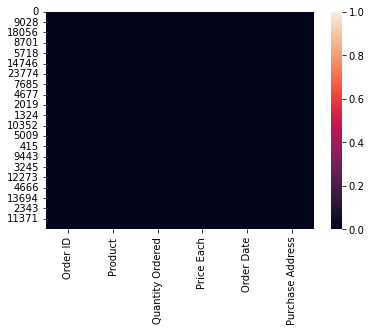

In [6]:
#heatmap to check nulls
sns.heatmap(data=pd.isnull(data))

In [7]:
#drop nas from the data 
data = data.dropna()
#we check the size and confirm the drop
data.size

1134036

In [8]:
#check data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189006 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          189006 non-null  object
 1   Product           189006 non-null  object
 2   Quantity Ordered  189006 non-null  object
 3   Price Each        189006 non-null  object
 4   Order Date        189006 non-null  object
 5   Purchase Address  189006 non-null  object
dtypes: object(6)
memory usage: 10.1+ MB


In [9]:
#we have a problem with the data that has text repetition
data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [10]:
#create filter to drop text values
filter_repeated_values = data['Quantity Ordered'] != 'Quantity Ordered'

#replace data without text values in quality ordered
data = data[filter_repeated_values]


In [11]:
#check data quantity ordered
data['Quantity Ordered'].unique()
data.size

1131924

In [12]:
#Create month, year, time column
data['month'] = data['Order Date'].str[0:2]
data['year'] = data['Order Date'].str[6:8]
data['time'] = data['Order Date'].str[-6:-3]
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09
...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,19,04
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,19,22
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,19,20
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,19,17


In [13]:
#change columns types
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [14]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188654 entries, 0 to 20378
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          188654 non-null  object 
 1   Product           188654 non-null  object 
 2   Quantity Ordered  188654 non-null  int64  
 3   Price Each        188654 non-null  float64
 4   Order Date        188654 non-null  object 
 5   Purchase Address  188654 non-null  object 
 6   month             188654 non-null  object 
 7   year              188654 non-null  object 
 8   time              188654 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.4+ MB


In [15]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09
...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,19,04
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,19,22
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,19,20
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,19,17


<h3>Modify Data</h3>

In [16]:
#take cityy from address
city = data['Purchase Address'].str.split(", ",expand=True)[1]
city

0               Dallas
2               Boston
3          Los Angeles
4          Los Angeles
5          Los Angeles
             ...      
20374    San Francisco
20375      Los Angeles
20376    San Francisco
20377          Seattle
20378      Los Angeles
Name: 1, Length: 188654, dtype: object

In [17]:
#join city colum to data
data = pd.concat([data,city],axis=1)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time,1
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,19,04,San Francisco
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,19,22,Los Angeles
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,19,20,San Francisco
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,19,17,Seattle


In [18]:
#rename column name
data = data.rename({1:'City'},axis=1)

In [19]:
#create a Sales column = Price * Quantity
data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [20]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09,Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,19,04,San Francisco,3.84
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,19,22,Los Angeles,11.99
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,19,20,San Francisco,3.84
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,19,17,Seattle,700.00


<h3>Questions</h3>

Q1: What was the best Year for sales? How much was earned that Year?

In [21]:
#take columns from data
data_q1 = data[['year','Sales']]

In [22]:
#only one year, 2019 was the best year
data_q1.groupby(['year']).sum()

,Sales
year,
19,35021340.50
20,8670.29


Q2: What was the best month for sales? How much was earned that month?

In [23]:
#create data and group by month, sorted by sales
data_q2 = data[['month','Sales']]
data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

month
10    7470100.45
12    4610626.83
04    3390670.24
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
11       7020.96
Name: Sales, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Sales'>

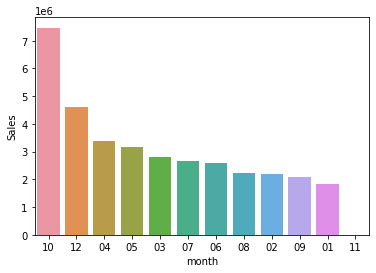

In [24]:
#make bar plot with sns
plot_q2 = data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

sns.barplot(x=plot_q2.index ,y= plot_q2)

Q3: What City had the highest number of sales?

In [25]:
data_q3 = data[['City','Sales']]
data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

City
San Francisco    8363720.41
Los Angeles      5563993.66
New York City    4722238.48
Boston           3677726.28
Dallas           2843648.88
Atlanta          2826762.86
Seattle          2813320.13
Portland         2367229.60
Austin           1851370.49
Name: Sales, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Sales'>

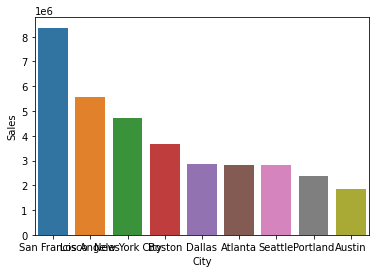

In [26]:
plot_q3 = data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

sns.barplot(x=plot_q3.index, y=plot_q3)

Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [27]:
data_q4 = data[['time','Sales']]
data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

time
 00     727659.74
 01     472312.15
 02     245432.82
 03     150297.95
 04     172830.25
 05     232336.55
 06     452250.21
 07     759249.23
 08    1214028.51
 09    1665504.80
 10    1977696.35
 11    2350779.69
 12    2385176.95
 13    2169868.80
 14    2114545.26
 15    1946236.76
 16    1980187.34
 17    2135087.96
 18    2226346.52
 19    2477184.13
 20    2282221.92
 21    2092537.46
 22    1611524.64
 23    1188714.80
Name: Sales, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Sales'>

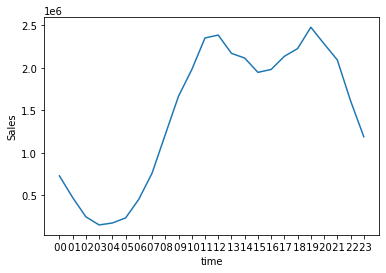

In [28]:
plot_q4 = data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

sns.lineplot(x=plot_q4.index , y=plot_q4)

Q5: What products are most often sold together?

In [29]:
data_q5 = data[['Order ID','Product']]
data_q5 = data_q5[data_q5['Order ID'].duplicated(keep=False)].sort_values(['Product'])
data_q5

,Order ID,Product
8895,267847,20in Monitor
18444,276948,20in Monitor
737,194791,20in Monitor
11017,269873,20in Monitor
9090,268032,20in Monitor
...,...,...
16484,209778,iPhone
13374,308427,iPhone
5883,264966,iPhone
16111,274725,iPhone


In [30]:
data_q5.groupby('Order ID').sum()['Product']

Order ID
141275              USB-C Charging CableWired Headphones
141290     AA Batteries (4-pack)Apple Airpods Headphones
141365                   Vareebadd PhoneWired Headphones
141384                  Google PhoneUSB-C Charging Cable
141450            Bose SoundSport HeadphonesGoogle Phone
                               ...                      
319536                Macbook Pro LaptopWired Headphones
319556                      Google PhoneWired Headphones
319584                            Wired HeadphonesiPhone
319596                    Lightning Charging CableiPhone
319631    34in Ultrawide MonitorLightning Charging Cable
Name: Product, Length: 25104, dtype: object

In [31]:
data_q5_groups = pd.DataFrame(data_q5.groupby('Order ID').sum()['Product'])
data_q5_groups['number'] = data_q5_groups.index
data_q5_groups.groupby(['Product']).count().sort_values(['number'],ascending=False).head(10)


,number
Product,
Lightning Charging CableLightning Charging Cable,2258
USB-C Charging CableUSB-C Charging Cable,2242
AA Batteries (4-pack)AA Batteries (4-pack),2189
AAA Batteries (4-pack)AAA Batteries (4-pack),2186
Wired HeadphonesWired Headphones,1905
Apple Airpods HeadphonesApple Airpods Headphones,1592
Bose SoundSport HeadphonesBose SoundSport Headphones,1361
27in FHD Monitor27in FHD Monitor,755
Lightning Charging CableiPhone,730


Q6: What product sold the most? Why do you think it sold the most?

In [32]:
data_q6 = data[['Product','Quantity Ordered']]
data_q6.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

Product
AAA Batteries (4-pack)        31352
AA Batteries (4-pack)         27944
USB-C Charging Cable          24389
Lightning Charging Cable      23574
Wired Headphones              20893
Apple Airpods Headphones      15825
Bose SoundSport Headphones    13671
27in FHD Monitor               7624
iPhone                         6901
27in 4K Gaming Monitor         6389
34in Ultrawide Monitor         6321
Google Phone                   5637
Flatscreen TV                  4883
Macbook Pro Laptop             4813
ThinkPad Laptop                4216
20in Monitor                   4136
Vareebadd Phone                2094
LG Washing Machine              674
LG Dryer                        640
Name: Quantity Ordered, dtype: int64

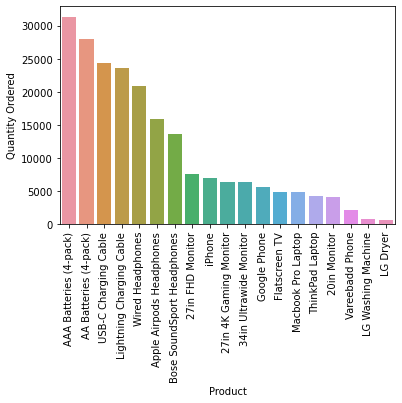

In [33]:
plot_q6 = data_q6.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

plt = sns.barplot(x=plot_q6.index, y=plot_q6)

for item in plt.get_xticklabels():
    item.set_rotation(90)